# **Unsupervised-Machine-Learning-Clustering /medicineData.csv**

# **Name: Yididiya Beyene**  **Id:1501396**





# **Unsupervised-Machine-Learning-Clustering /medicineData.csv**

# **Introduction**

- Unsupervised machine learning is used to analyze and discover patterns in data when no labeled output is available. One of the most common unsupervised techniques is clustering, which groups data points based on similarity.

 * In this project, K-Means Clustering and Hierarchical Clustering are applied to a medicine dataset using two numerical features: Weight Index and pH value. Additionally, the Elbow Method and Silhouette Score are used to evaluate the quality of clustering and determine the optimal number of clusters.

# **Problem Statement**

* Medicines often share similar chemical and physical properties, but manually grouping them based on these attributes is difficult and inefficient. There is no predefined class label available for the dataset.

     -> The problem addressed in this project is:

* How can medicines be grouped automatically based on their numerical properties using unsupervised learning techniques?

# **Objectives**

-> The main objectives of this project are:

* To apply K-Means clustering on a medicine dataset

* To determine the optimal number of clusters using the Elbow Method

* To evaluate cluster quality using the Silhouette Score

* To implement Hierarchical Clustering and visualize relationships using a dendrogram

* To compare clustering results and draw meaningful conclusions

## **Uploade the file to the google colab**

In [2]:
from google.colab import files
import pandas as pd
uploaded = files.upload()


Saving medicineData (1).csv to medicineData (1).csv


**Importing Required Libraries**

**Description:**

* **pandas & numpy:-** Used for data handling and numerical operations

* **matplotlib:-** Used for data visualization

* **StandardScaler:** Scales features so they contribute equally

* **KMeans & AgglomerativeClustering:** Clustering algorithms

* **silhouette_score:** Measures clustering quality

* **dendrogram & linkage:** Used to visualize hierarchical clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


**Loading the Dataset**

**Description:**

* Loads the medicine dataset from a CSV file

* Displays the dataset to verify successful loading

In [4]:

df = pd.read_csv("medicineData (1).csv")

print("Dataset Preview:")
print(df)


Dataset Preview:
  Medicine  Weight index  Ph
0        A             1   1
1        B             2   1
2        C             4   3
3        D             5   4


In [5]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Medicine      4 non-null      object
 1   Weight index  4 non-null      int64 
 2   Ph            4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes


(4, 3)

**Feature Selection**

**Description:**

* Selects only numerical features required for clustering

* The Medicine column is excluded because clustering works only with numerical data

In [6]:

X = df[['Weight index', 'Ph']]


**Data Standardization**

**Description:**

* Standardizes the features to have mean 0 and standard deviation 1

* Prevents features with larger values from dominating clustering results

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Elbow Method (Finding Optimal Number of Clusters)**

**Description:**

WCSS (Within-Cluster Sum of Squares) measures how compact clusters are

K values are limited to 1–4 because the dataset contains only 4 samples

Lower WCSS indicates better clustering

* The elbow point appears at K = 2, indicating the optimal number of clusters

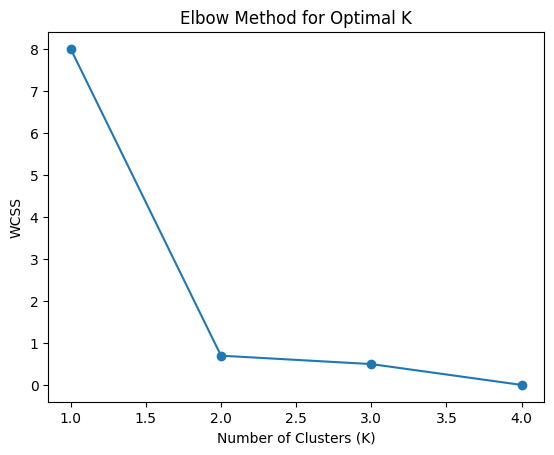

In [8]:
wcss = []
K_range = range(1, 5)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


**K-Means Clustering (K = 2)**

**Description:**

* Applies K-Means clustering with K = 2

* Assigns each medicine to a cluster based on similarity

In [9]:

kmeans = KMeans(n_clusters=2, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

print("\nK-Means Clustering Results:")
print(df[['Medicine', 'KMeans_Cluster']])



K-Means Clustering Results:
  Medicine  KMeans_Cluster
0        A               0
1        B               0
2        C               1
3        D               1


**Silhouette Score (K-Means)**

**Description:**
The Silhouette Score measures how well data points fit within their cluster.


Measures how well each data point fits within its cluster

Score range: –1 to +1

A positive score indicates good separation between clusters

In [10]:
silhouette_kmeans = silhouette_score(X_scaled, df['KMeans_Cluster'])

print("Silhouette Score for K-Means:", silhouette_kmeans)


Silhouette Score for K-Means: 0.6926786798625666


**Hierarchical Clustering**

**Description:**

Uses agglomerative hierarchical clustering

Builds clusters by merging the most similar points

In [11]:

hierarchical = AgglomerativeClustering(n_clusters=2)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_scaled)

print("\nHierarchical Clustering Results:")
print(df[['Medicine', 'Hierarchical_Cluster']])



Hierarchical Clustering Results:
  Medicine  Hierarchical_Cluster
0        A                     1
1        B                     1
2        C                     0
3        D                     0


**Silhouette Score (Hierarchical)**

**Description:**


Evaluates the quality of hierarchical clustering

Confirms whether clusters are well-formed

In [12]:
silhouette_hierarchical = silhouette_score(
    X_scaled, df['Hierarchical_Cluster']
)

print("Silhouette Score for Hierarchical Clustering:", silhouette_hierarchical)


Silhouette Score for Hierarchical Clustering: 0.6926786798625666


**Visualization of K-Means Clusters**

**Description:**

The scatter plot shows how medicines are grouped into distinct clusters based on their similarity in Weight Index and pH values.

* Medicines with similar feature values appear close together.

* Different colors represent different clusters.

* The clear separation between colored groups confirms that K-Means successfully identified meaningful clusters.

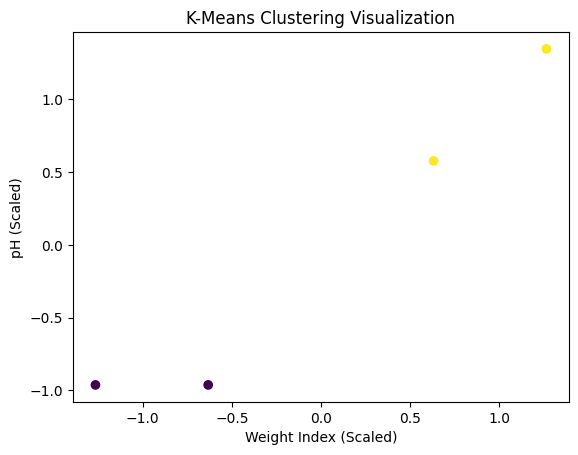

In [13]:
plt.figure()
plt.scatter(
    X_scaled[:, 0],
    X_scaled[:, 1],
    c=df['KMeans_Cluster']
)
plt.xlabel("Weight Index (Scaled)")
plt.ylabel("pH (Scaled)")
plt.title("K-Means Clustering Visualization")
plt.show()


**Visualization of Hierarchical Dendrogram**

The dendrogram shows how individual medicines are progressively merged into clusters based on similarity:

* Medicines A and B merge at a lower distance, indicating high similarity.

* Medicines C and D also merge at a low distance, forming another cluster.

* The height at which clusters merge indicates how different they are.

* Cutting the dendrogram at a suitable distance results in two main clusters, consistent with K-Means clustering.

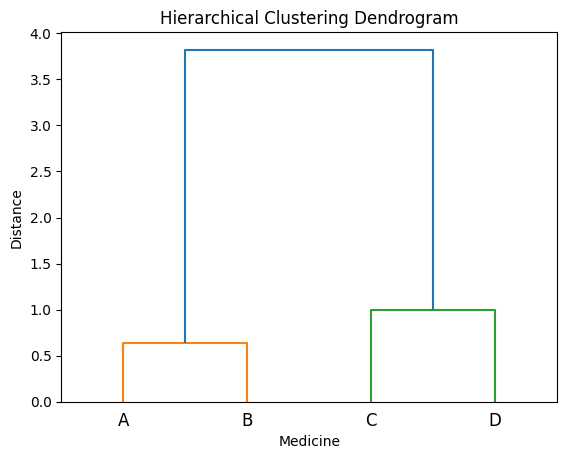

In [14]:
linked = linkage(X_scaled, method='ward')

plt.figure()
dendrogram(
    linked,
    labels=df['Medicine'].values
)
plt.xlabel("Medicine")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


**The Final Dataset With Cluster**

In [15]:
print("\nFinal Dataset with Clusters:")
print(df)



Final Dataset with Clusters:
  Medicine  Weight index  Ph  KMeans_Cluster  Hierarchical_Cluster
0        A             1   1               0                     1
1        B             2   1               0                     1
2        C             4   3               1                     0
3        D             5   4               1                     0


# **Results**

* Medicines A and B are grouped together

* Medicines C and D are grouped together

* Both K-Means and Hierarchical Clustering produce consistent results

* Silhouette scores indicate good cluster separation

# **Conclusion**

This project successfully applied unsupervised learning techniques to group medicines based on numerical attributes. The Elbow Method identified the optimal number of clusters as two, and the Silhouette Score validated the quality of clustering. Both K-Means and Hierarchical Clustering produced meaningful and consistent results.

The study demonstrates that unsupervised machine learning can effectively uncover hidden patterns in small datasets when proper preprocessing and evaluation techniques are applied.